# BuildYourOwnEmbedding Examples

In [1]:
import sys
sys.path.append('../')

In [2]:
from BuildYourOwnEmbedding import responses, parameters, functional
import numpy as np
import matplotlib.pyplot as plt


## Generating Simple Curve Functions:


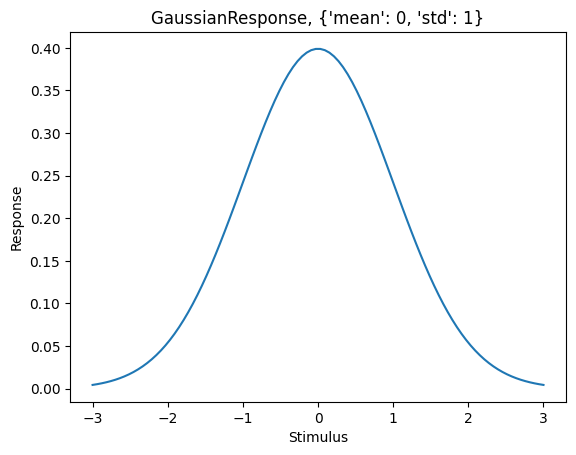

In [3]:
gaussianResponse = responses.GaussianResponse(mean=0, std=1)

# gaussianResponse now behaves like a function, e.g.:
x = np.linspace(-3, 3, 100)
response = gaussianResponse(x)

plt.plot(x, response)
plt.title(str(gaussianResponse))  # the str function can be called to get the name + parameters of the response
plt.xlabel("Stimulus")
plt.ylabel("Response")
plt.show()

## Generate a set of curves varying a single parameter: 

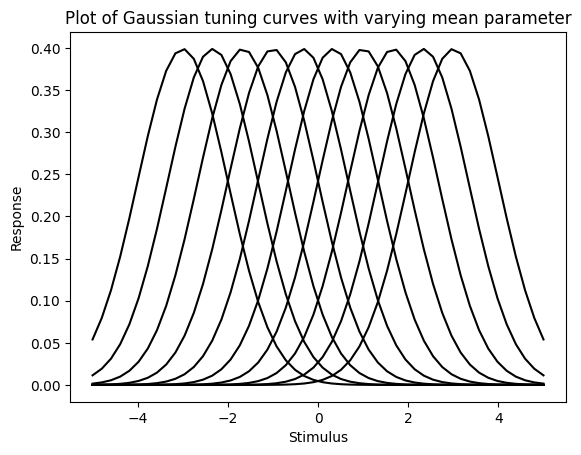

In [8]:
# uniformly varying the mean parameter of the Gaussian response:
x = np.linspace(-5, 5, 50)
meanParameter = parameters.UniformRangeParameter(minValue=-3, maxValue=3, numSamples=10)
stdParameter = parameters.ConstantParameter(value=1)
responseManager = responses.ResponseManager(responseClasses=responses.GaussianResponse, mean=meanParameter, std=stdParameter)
gaussianResponses = responseManager.generate_responses(x)
for re in gaussianResponses:
    plt.plot(x, re.response, color="black")
plt.title("Plot of Gaussian tuning curves with varying mean parameter")
plt.xlabel("Stimulus")
plt.ylabel("Response")
plt.show()

In [10]:
# each response in the list of responses has the following attributes:
print(
    gaussianResponses[0].params, # the parameters that created the response
    "\n\n",
    gaussianResponses[0].response,  # the actual response values
    "\n\n",
    gaussianResponses[0].responseFunction,  # the name of the function that created the response
)

{'mean': -3.0, 'std': array([1.])} 

 [5.39909665e-02 7.95316738e-02 1.12375355e-01 1.52304931e-01
 1.98001638e-01 2.46908214e-01 2.95334528e-01 3.38847936e-01
 3.72912892e-01 3.93660541e-01 3.98610105e-01 3.87156592e-01
 3.60692361e-01 3.22328839e-01 2.76295186e-01 2.27174407e-01
 1.79166753e-01 1.35539967e-01 9.83533740e-02 6.84578227e-02
 4.57055390e-02 2.92702560e-02 1.79802672e-02 1.05944324e-02
 5.98785368e-03 3.24620990e-03 1.68808360e-03 8.42021609e-04
 4.02869562e-04 1.84891782e-04 8.13921825e-05 3.43684315e-05
 1.39203022e-05 5.40816024e-06 2.01540518e-06 7.20422257e-07
 2.47015273e-07 8.12404697e-08 2.56290777e-08 7.75542250e-09
 2.25107457e-09 6.26738296e-10 1.67376514e-10 4.28760468e-11
 1.05352995e-11 2.48308149e-12 5.61367144e-13 1.21734855e-13
 2.53218147e-14 5.05227108e-15] 

 GaussianResponse


## Generating an RDM

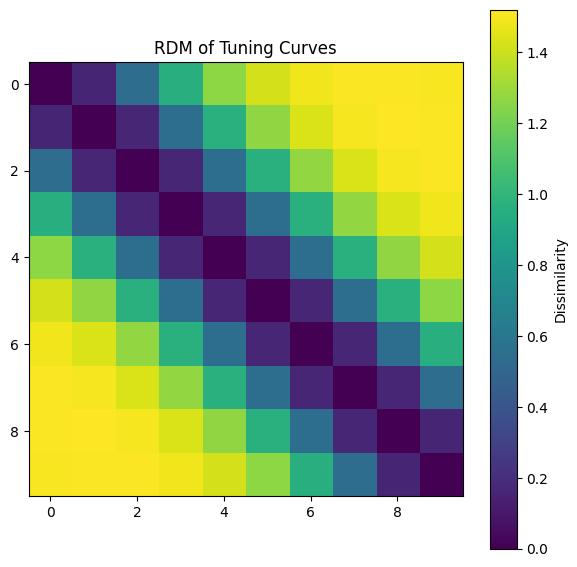

In [12]:
responseSet = responses.ResponseSet(gaussianResponses)
gaussianRDM = responseSet.compute_rdm(dissimilarity_metric=functional.inverse_correlation)
functional.plot_rdm(gaussianRDM)